# Exercise2

## Exe2.Question1. Divide Data set into Training set and Test set of size 100

In [32]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


In [33]:
data = np.loadtxt('polynomial200.csv' ,delimiter=',')

In [34]:
np.random.shuffle(data)
train, test = data[:100,:], data[100:,:]

x_train = train[:,0].reshape(100,1)
y_train = train[:,1]

x_test = test[:,0].reshape(100,1)
y_test = test[:,1]

## Exe2.Question2. Plot Training and Test Set side by side

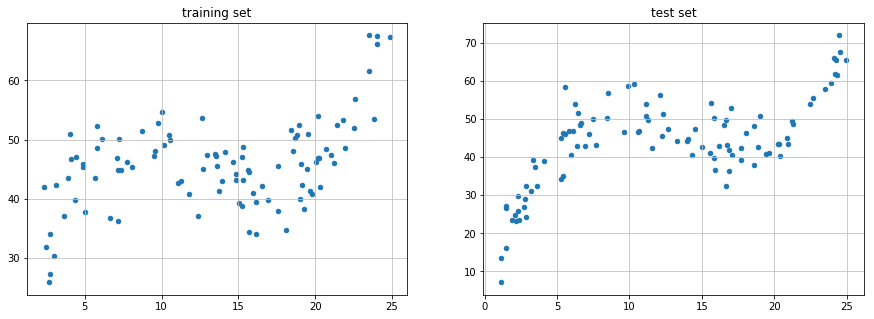

In [35]:
plt.figure(figsize=(15,5))

plt.subplot(121)
plt.scatter(x_train, y_train, s=20)
plt.grid(True, linestyle='-', color='0.75')
plt.title("training set")

plt.subplot(122)
plt.scatter(x_test.reshape(100,1), y_test.reshape(100,1), s=20)
plt.grid(True, linestyle='-', color='0.75')
plt.title("test set")


plt.show()

## Exe2.Question3. Plot k_NN Regression result and MSE training error for k=1,3,5,7.

In [36]:
def euclidean_distance(x,y):
    return np.sqrt(np.sum((x-y)**2,axis=0))   

In [37]:
 def MSE(real_v, est_v):
    return ((real_v - est_v)**2).mean()

In [23]:
def knn_r(xtr,xte,ytr,k=1):
    
    distance_list = [[euclidean_distance(train_i,test_i) for train_i in xtr] for test_i in  xte]
    distance_list = np.array(distance_list)
       
    sorted_distance_list = np.sort(distance_list, axis=1)
    sorted_index = np.argsort(distance_list, axis=1)

    
    k_nearest_poins = np.take(xtr,sorted_index[:,0:k],axis=0)
    
    k_nearest_value = np.take(ytr,sorted_index[:,0:k],axis=0)
        
    distance_k_nearest_points = [sorted_distance_list[:,0:k] ]
    
    estimated = []
    
    for p in k_nearest_value:
        estimated.append(p.mean())

    estimated = np.array(estimated)
    
    return estimated

NOTE: Since I am a little bit confused by plot, I consider plot for three different scenario:
1) plot prediction line for Train data
2) plot prediction line for Test data
3) Jonas clarification in forum mymoodle about plot

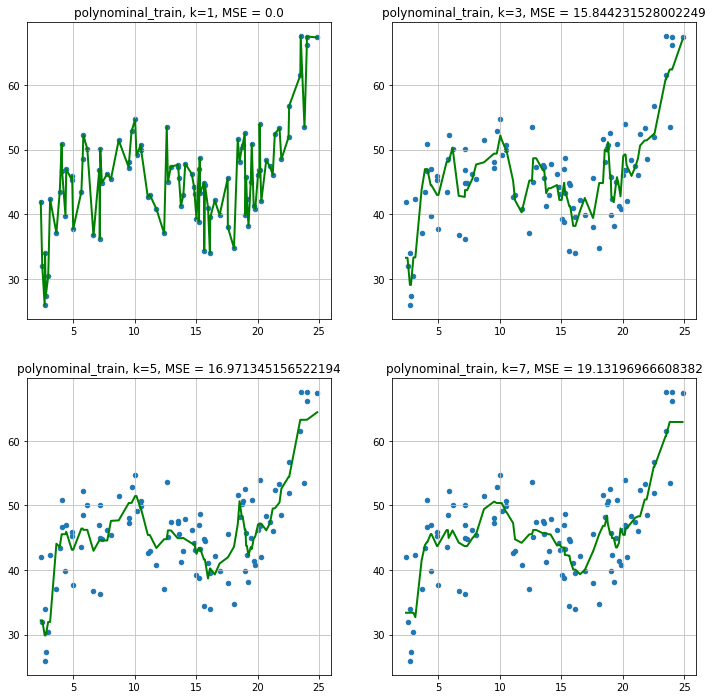

In [38]:
#plot Prediction line based on Training Set
plt.figure(figsize=(12,12))


for i,neib in enumerate([1,3,5,7],start=1):
    
    est=knn_r(x_train,x_train,y_train,k=neib)
    
    mse = MSE(y_train,est) 
    
    order = np.argsort(x_train.reshape(100))
    xs = np.array(x_train.reshape(100))[order]
    ys = np.array(est)[order]

    plt.subplot(220+i)
    plt.scatter(x_train, y_train, s=20)
    plt.grid(True, linestyle='-', color='0.75')
    plt.plot(xs,ys, linewidth=2, color='green')
    plt.title("polynominal_train, k={}, MSE = {}".format(neib,mse))
    
plt.show()

## Exe2.Question4. Compute the MSE test error for k=1,3,5,7. 

In [39]:
for neib in [1,3,5,7]:
    
    est=knn_r(x_train,x_test,y_train,k=neib)
    
    mse = MSE(y_test,est) 
    
    print("for K = {} MSE = {} ".format(neib,mse))    

for K = 1 MSE = 88.63788555202888 
for K = 3 MSE = 45.111520661963475 
for K = 5 MSE = 42.674073616183335 
for K = 7 MSE = 45.05044897773685 


## Exe2.Question4. Present the MSE test error for k=1,3,5,7. 

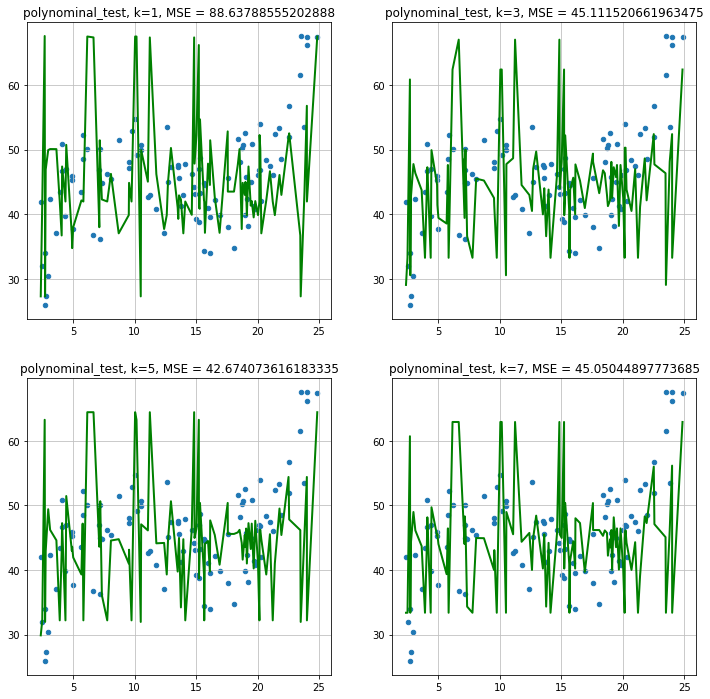

In [40]:
#plot Prediction line based on Test Set
plt.figure(figsize=(12,12))


for i,neib in enumerate([1,3,5,7],start=1):
    
    est=knn_r(x_train,x_test,y_train,k=neib)
    
    mse = MSE(y_test,est) 
    
    order = np.argsort(x_train.reshape(100))
    xs = np.array(x_train.reshape(100))[order]
    ys = np.array(est)[order]

    plt.subplot(220+i)
    plt.scatter(x_train, y_train, s=20)
    plt.grid(True, linestyle='-', color='0.75')
    plt.plot(xs,ys, linewidth=2, color='green')
    plt.title("polynominal_test, k={}, MSE = {}".format(neib,mse))
    
plt.show()

## ++++++++++++++++++++++++++++++++++++++++++++++++++

# Jonas Explanation in mymoodle Forum about plot: plot for default value (range(x_min,x_max)) on trainig set

In [26]:
v = np.linspace(x_train.min(),x_train.max(), num=100)

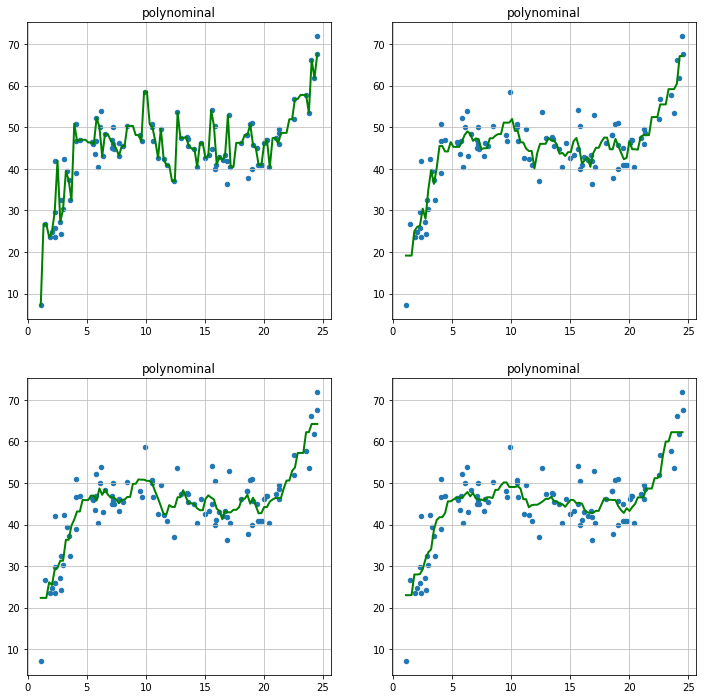

In [27]:
plt.figure(figsize=(12,12))


for i,neib in enumerate([1,3,5,7],start=1):
    
    est=knn_r(x_train,v,y_train,k=neib)
    
    #mse = MSE(???,est) 
    
    plt.subplot(220+i)
    plt.scatter(x_train, y_train, s=20)
    plt.grid(True, linestyle='-', color='0.75')
    plt.plot(v,est, linewidth=2, color='green')
    plt.title("polynominal")
    
plt.show()

## Exe2.Question5.  Which K gives the best classifier? 

A lot of reserach has shown that sqrt(N) which N specify the nember of data, is the best(Optimal) K. on the other hand, they claim that each dataset has it's own requirements. In the case We need to take it into account that, a small number of neighbors, the noise will have a higher influence on the result, and a large number of neighbors make it computationally expensive.
Moreover, Research has also shown that a small amount of neighbors are most flexible fit which will have low bias but high variance and a large number of neighbors will have a smoother decision boundary which means lower variance but higher bias.
Choosing the right value of k is a process called parameter tuning, and is important for better accuracy. 
The number of neighbors(K) in KNN is a hyperparameter.  

I consider the best k is the one that minimize the prediction error RMSE in our Test Data, and Since for K = 5 MSE = 42.67 for our Test data, I turn out that K=5 is the optimal K for Polynomial dataset.